<a href="https://colab.research.google.com/github/widyamelia26/Facial-Emotion-Recognition/blob/main/Emosi_ResEmoteNet_(57%2C27_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash

# Check if the dataset already exists
if test -e "emotion-detection-fer.zip"; then
    rm -rf emotion-detection-fer.zip ./train ./test
    kaggle datasets download -d ananthu017/emotion-detection-fer
    unzip emotion-detection-fer.zip
else
    kaggle datasets download -d ananthu017/emotion-detection-fer
    unzip emotion-detection-fer.zip
fi

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0

Archive:  emotion-detection-fer.zip
  inflating: test/angry/im0.png      
  inflating: test/angry/im1.png      
  inflating: test/angry/im10.png     
  inflating: test/angry/im100.png    
  inflating: test/angry/im101.png    
  inflating: test/angry/im102.png    
  inflating: test/angry/im103.png    
  inflating: test/angry/im104.png    
  inflating: test/angry/im105.png    
  inflating: test/angry/im106.png    
  inflating: test/angry/im107.png    
  inflating: test/angry/im108.png    
  inflating: test/angry/im109.png    
  inflating: test/angry/im11.png     
  inflating: test/angry/im110.png    
  inflating: test/angry/im111.png    
  inflating: test/angry/im112.png    
  inflating: test/angry/im113.png    
  inflating: test/angry/im114.png    
  inflating: test/angry/im115.png    
  inflating: test/angry/im116.png    
  inflating: test/angry/im117.png    
  inflating: test/angry/im118

100%|██████████| 65.2M/65.2M [00:00<00:00, 94.5MB/s]


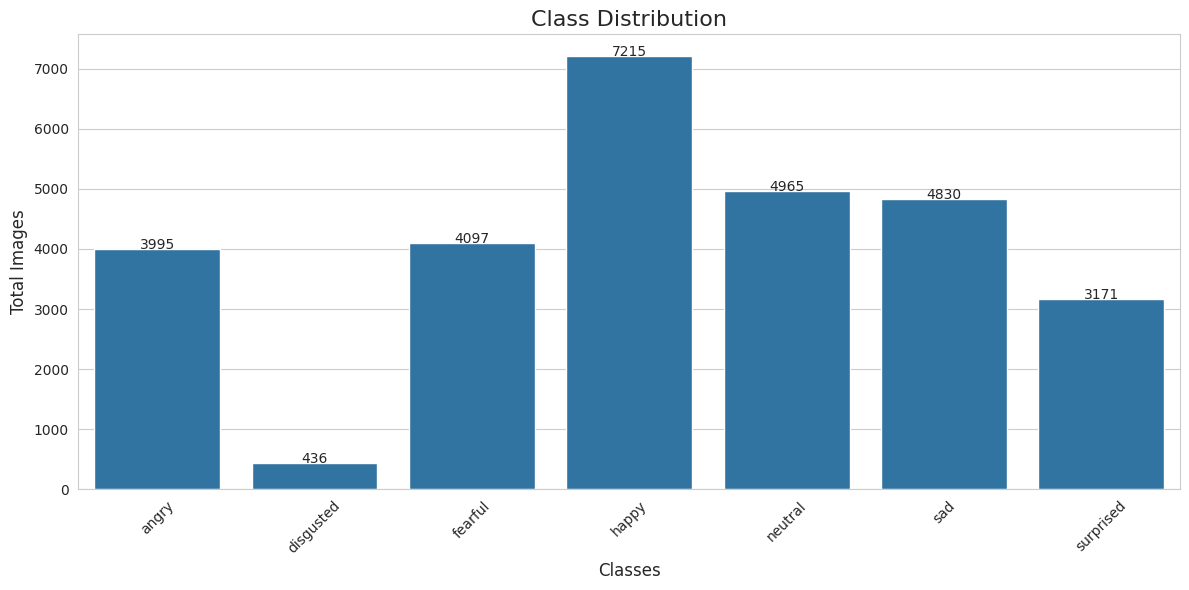

In [2]:
import glob

import matplotlib.pyplot as plt
import seaborn as sns


train_path = "/content/train"
test_path = "/content/test"
class_names = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]
class_distribution = {}

# Put image paths to dictionary using class names as keys.
for class_name in class_names:
    class_distribution[class_name] = len(glob.glob(f"{train_path}/{class_name}/*"))

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))

plt.title("Class Distribution", fontsize=16)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Total Images", fontsize=12)
plt.xticks(rotation=45)

# Add value labels of each bar.
for index, value in enumerate(class_distribution.values()):
    plt.text(index, value, str(value), ha="center", fontsize=10)

plt.tight_layout()
plt.show()

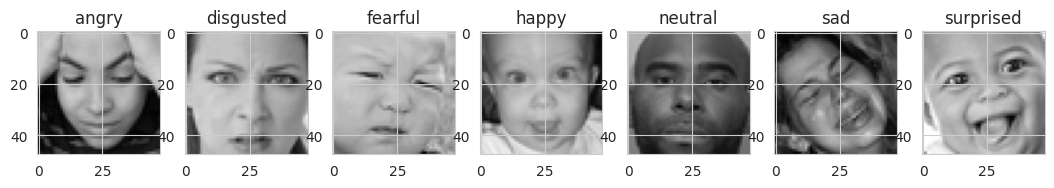

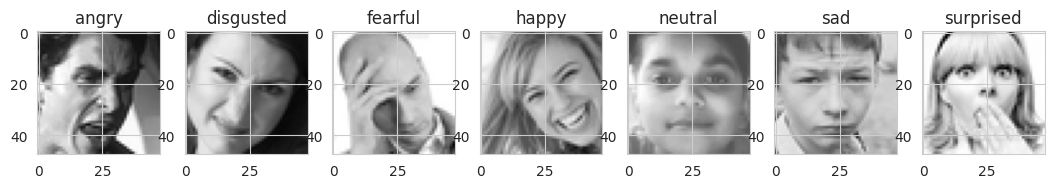

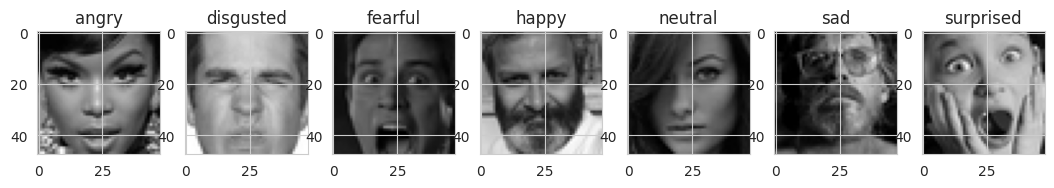

In [3]:
import cv2
import numpy as np


def plot_sample_images():
    fig, axis = plt.subplots(1, 7, figsize=[13, 15])

    for index, (class_name, count) in enumerate(class_distribution.items()):
        # Randomly choose images to plot.
        random_index = np.random.randint(0, count)
        img_read = cv2.imread(
            glob.glob(f"{train_path}/{class_name}/*")[random_index]
        )

        axis[index].imshow(img_read)
        axis[index].set_title(class_name)

# Plot several samples of each class.
for i in range(0, 3):
    plot_sample_images()

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Data generator for traning and validation.
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    validation_split=0.2 # 20% of images to be used for validation.
)

train_generator = train_data_generator.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=16,
    class_mode="categorical",
    subset="training"
)

validation_generator = train_data_generator.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=16,
    class_mode="categorical",
    subset="validation",
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [5]:
# Data generator for evaluation.
test_data_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_data_generator.flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=16,
    class_mode="categorical",
    shuffle = False  # Keep this False for confusion matrix.
)

Found 7178 images belonging to 7 classes.


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ se_block_1 (SEBlock)                 │ (None, 8, 8, 256)           │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_block_3 (ResidualBlock)     │ (None, 4, 4, 512)           │       3,677,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_block_4 (ResidualBlock)     │ (None, 2, 2, 1024)          │      14,695,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_block_5 (ResidualBlock)     │ (None, 1, 1, 2048)          │      58,750,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 80,260,999 (306.17 MB)

 Trainable params: 80,238,599 (306.09 MB)

 Non-trainable params: 22,400 (87.50 KB)

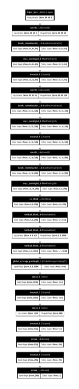

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.utils import plot_model

class SEBlock(tf.keras.layers.Layer):
    def __init__(self, in_channels, reduction=16):
        super(SEBlock, self).__init__()
        self.in_channels = in_channels
        self.reduction = reduction
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        self.fc1 = layers.Dense(in_channels // reduction, activation='relu', use_bias=False)
        self.fc2 = layers.Dense(in_channels, activation='sigmoid', use_bias=False)

    def call(self, inputs):
        y = self.global_avg_pool(inputs)
        y = self.fc1(y)
        y = self.fc2(y)
        y = tf.reshape(y, [-1, 1, 1, self.in_channels])
        return inputs * y


class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = layers.Conv2D(out_channels, kernel_size=3, strides=stride, padding="same")
        self.bn1 = layers.BatchNormalization()
        self.conv2 = layers.Conv2D(out_channels, kernel_size=3, strides=1, padding="same")
        self.bn2 = layers.BatchNormalization()

        self.shortcut = models.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut.add(layers.Conv2D(out_channels, kernel_size=1, strides=stride, padding="same"))
            self.shortcut.add(layers.BatchNormalization())

    def call(self, inputs):
        x = tf.nn.relu(self.bn1(self.conv1(inputs)))
        x = self.bn2(self.conv2(x))
        shortcut = self.shortcut(inputs)
        x = layers.add([x, shortcut])
        return tf.nn.relu(x)


def create_ResEmoteNet(input_shape=(64, 64, 3)):
    inputs = layers.Input(shape=input_shape)

    # Initial convolutional and batch normalization layers
    x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = SEBlock(256)(x)

    # Residual blocks
    x = ResidualBlock(256, 512, stride=2)(x)
    x = ResidualBlock(512, 1024, stride=2)(x)
    x = ResidualBlock(1024, 2048, stride=2)(x)

    # Pooling and fully connected layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(7, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Instantiate the model
model = create_ResEmoteNet((64, 64, 3))
model.summary()

# Gambar flowchart dari model
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Menampilkan flowchart dalam notebook
img = plt.imread('cnn_model.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
import tensorflow as tf
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


model.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9, weight_decay=1e-4),
    loss=categorical_crossentropy,
    metrics=["accuracy"]
)

# Define callbacks.
early_stopping = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True,verbose=1)
checkpoint = ModelCheckpoint("emotion_detection_model.keras", monitor="val_accuracy", save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, min_lr=1e-7, verbose=1)

# Train the model.
history = model.fit(
    train_generator,
    epochs=80,
    validation_data=validation_generator,
    callbacks=[early_stopping, checkpoint, reduce_lr]
    )

# Determine at which epoch early stopping occurred
stopped_epoch = len(history.history['accuracy'])
print(f"Training stopped at epoch: {stopped_epoch}")

Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1436/1436 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2109 - loss: 22.9559
Epoch 1: val_accuracy improved from -inf to 0.26006, saving model to emotion_detection_model.keras
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 107s 58ms/step - accuracy: 0.2109 - loss: 22.9539 - val_accuracy: 0.2601 - val_loss: 15.2569 - learning_rate: 0.0010
Epoch 2/80
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2798 - loss: 13.5109
Epoch 2: val_accuracy improved from 0.26006 to 0.32468, saving model to emotion_detection_model.keras
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 77s 53ms/step - accuracy: 0.2798 - loss: 13.5099 - val_accuracy: 0.3247 - val_loss: 9.2633 - learning_rate: 0.0010
Epoch 3/80
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3333 - loss: 8.2996
Epoch 3: val_accuracy improved from 0.32468 to 0.36422, saving model to emotion_detection_model.keras
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 68s 47ms/step - accuracy: 0.3333 - loss: 8.2990 - val_accuracy: 0.3642 - val_loss: 5.9048 - learning_rate: 0.0010


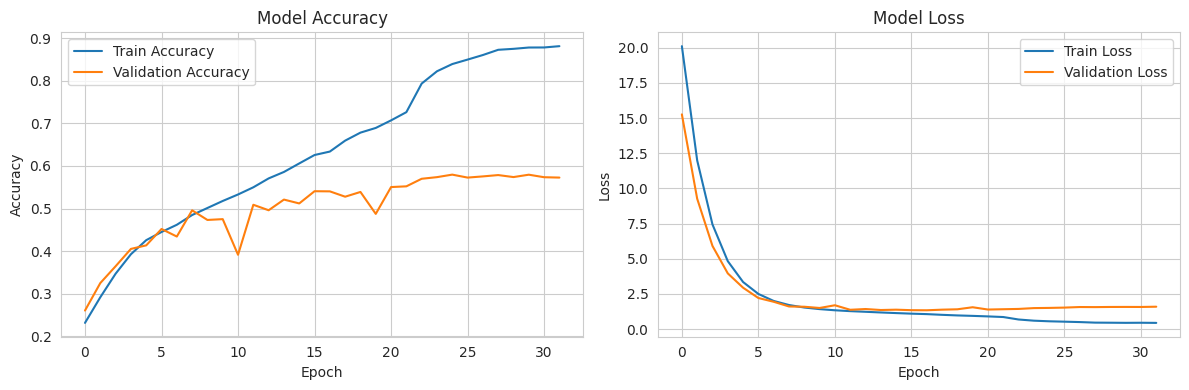

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step


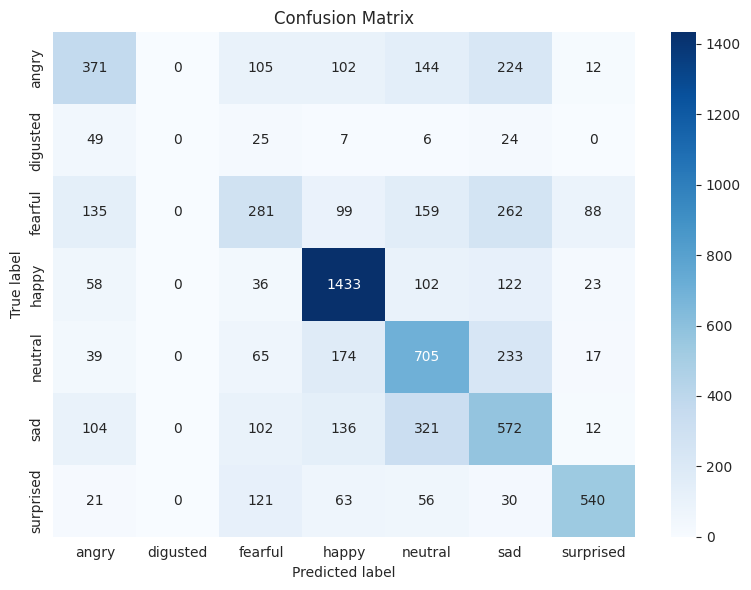

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Nama-nama kelas emosi
class_names = ["angry", "digusted", "fearful", "happy", "neutral", "sad", "surprised"]

# Peroleh true labels dari test generator
true_labels = test_generator.classes

# Reset test generator sebelum prediksi
test_generator.reset()

# Dapatkan prediksi model pada data test
predicted = model.predict(test_generator)
predicted_labels = np.argmax(predicted, axis=1)

# Hitung confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

## Using Transfer Learning

### VGGNet

### ResNet

### ImageNet